Valid:
* TOB3_long2
* TOB3_long3
* TOB3_long4

,TIMESTAMP,text_val,temp_Avg(1),temp_Avg(2),temp_Avg(3),temp(1),temp(2),temp(3),temp(4),temp(5),text_val_2,toggle,temp_bool8(1),temp_bool8(2),temp(8),rand,text_val_3
RECORD,,,,,,,,,,,,,,,,,
5333,2026-02-19 09:46:17.005,64291,NaN,NaN,NaN,-0.428277,0.428,-0.471105,4216,26636000,142857,-1,11111111,11111111,0,-0.428277,314159
5334,2026-02-19 09:46:17.010,64291,NaN,NaN,NaN,-0.468789,0.469,-0.515668,4266,26641000,142857,-1,11111111,11111111,0,-0.468789,314159
5335,2026-02-19 09:46:17.015,64291,NaN,NaN,NaN,-0.517095,0.517,-0.568805,4316,26646000,142857,0,11111111,11111111,0,-0.517095,314159
5336,2026-02-19 09:46:17.025,64291,NaN,NaN,NaN,-0.417688,0.418,-0.459457,4366,26651000,142857,-1,11111111,11111111,0,-0.417688,314159
5337,2026-02-19 09:46:17.030,64291,NaN,NaN,NaN,NaN,0.427,-0.469908,4416,26656000,142857,-1,0,0,0,-0.427189,314159
5338,2026-02-19 09:46:17.035,64291,NaN,NaN,NaN,-0.485818,0.486,-0.534400,4466,26661000,142857,0,11111111,11111111,0,-0.485818,314159
5339,2026-02-19 09:46:17.040,64291,NaN,NaN,NaN,-0.351933,0.352,-0.387127,4516,26666000,142857,-1,11111111,11111111,0,-0.351933,314159
5340,2026-02-19 09:46:17.045,64291,NaN,NaN,NaN,-0.411899,0.412,-0.453089,4566,26671000,142857,-1,11111111,11111111,0,-0.411899,314159


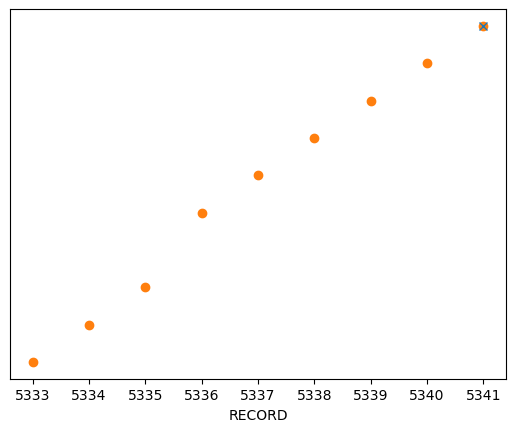

In [1]:
import pandas as pd
from camp2ascii import camp2ascii

bad_files = [
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/c2a/TOA5_TOB3_long27.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/c2a/TOA5_TOB3_long26.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/c2a/TOA5_TOB3_long24.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/c2a/TOA5_TOB3_long19.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/c2a/TOA5_TOB3_long25.dat",
]

ref_files = [
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/cc/TOA5_TOB3_long27_2026_02_19_0946.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/cc/TOA5_TOB3_long26_2026_02_19_0946.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/cc/TOA5_TOB3_long24_2026_02_19_0946.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/cc/TOA5_TOB3_long19_2026_02_19_0946.dat",
    "/Users/alex/Library/CloudStorage/OneDrive-UniversityofWyoming/Work/UWyo/Research/camp2ascii/tests/cc/TOA5_TOB3_long25_2026_02_19_0946.dat",
]

i = 0

my_tob3 = pd.read_csv(
    bad_files[0],
    skiprows=[0, 2, 3], na_values=["NAN", "NaN", "nan", "-9999"]
).set_index("RECORD")

ref_tob3 = pd.read_csv(
    ref_files[0],
    skiprows=[0, 2, 3], na_values=["NAN", "NaN", "nan", "-9999"]
).set_index("RECORD")


my_tob3['TIMESTAMP'] = pd.to_datetime(my_tob3['TIMESTAMP'], format="ISO8601")
ref_tob3['TIMESTAMP'] = pd.to_datetime(ref_tob3['TIMESTAMP'], format="ISO8601")

ref_tob3.sort_index(inplace=True)
my_tob3.sort_index(inplace=True)

start, end = 5333, 5341
# start, end = my_tob3.index[0], my_tob3.index[-1]
# start, end = 7100, 7200
ax = ref_tob3["TIMESTAMP"].loc[start:end].plot(color="C1", style="o")
my_tob3["TIMESTAMP"].loc[start:end].plot(style="x")

# my_tob3.shape, ref_tob3.shape

import numpy as np
ref_tob3.loc[np.setdiff1d(np.union1d(my_tob3.index, ref_tob3.index), np.intersect1d(my_tob3.index, ref_tob3.index))]

# # my_tob3

In [118]:
minor_frame_headers_raw = [b'(\xbf\xf9C\x02\x08\x00\x00\xd3\x18\x00\x00', b'(\xbf\xf9C\x96\x00\x00\x00\xd8\x18\x00\x00']


print(pd.to_datetime([((631152000+int.from_bytes(h[:4], "little"))*1000000000 + int(int.from_bytes(h[4:8], "little")*100e-6*1e6)*1000) for h in minor_frame_headers_raw], unit="ns"))
print([int.from_bytes(h[8:], "little") for h in minor_frame_headers_raw])

DatetimeIndex(['2026-02-20 13:07:52.205000', '2026-02-20 13:07:52.015000'], dtype='datetime64[ns]', freq=None)
[6355, 6360]


In [1]:
from unittest import TestCase
from math import ceil
from pathlib import Path
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import camp2ascii.formats as fmt
from camp2ascii import camp2ascii

fmt.REPAIR_MISALIGNED_MINOR_FRAMES = False


parent = Path("/home/alextsfox/git-repos/camp2ascii/tests")

in_dir = parent / "raw"

out_dir = parent / "c2a"
out_dir.mkdir(parents=True, exist_ok=True)

# fig, axs = plt.subplots(ceil(20/2), 2, figsize=(12, 15), sharex=True)
try:
    out_files = camp2ascii(in_dir, out_dir, pbar=True, verbose=3)
    for f in out_files:
        file_type = re.search(r"TOB\d", f.name).group(0)

        my_tob3 = pd.read_csv(f, skiprows=[0, 2, 3], na_values=["NAN", '"NAN"'])
        my_tob3["TIMESTAMP"] = pd.to_datetime(my_tob3["TIMESTAMP"], format="ISO8601")

        ref_file = list((out_dir.parent / "cc").glob(f"*{f.stem}*"))[0]
        ref_tob3 = pd.read_csv(ref_file, skiprows=[0, 2, 3], na_values=["NAN", '"NAN"'])
        ref_tob3["TIMESTAMP"] = pd.to_datetime(ref_tob3["TIMESTAMP"], format="ISO8601")

        if "temp_TMx(1)" in ref_tob3.columns:
            ref_tob3["temp_TMx(1)"] = pd.to_datetime(ref_tob3["temp_TMx(1)"], format="ISO8601")
            my_tob3["temp_TMx(1)"] = pd.to_datetime(my_tob3["temp_TMx(1)"], format="ISO8601")
        
        for col in ref_tob3.columns:
            if col in {"TIMESTAMP", "temp_TMx(1)"}:
                ref_tob3[col] = ref_tob3[col].astype(np.int64)
                my_tob3[col] = my_tob3[col].astype(np.int64)
            ref_tob3[col] = ref_tob3[col].astype(np.float64)
            my_tob3[col] = my_tob3[col].astype(np.float64)

        ref_tob3 = ref_tob3.set_index("RECORD")
        my_tob3 = my_tob3.set_index("RECORD")


        common_idx = ref_tob3.index.union(my_tob3.index)
        if file_type == "TOB3" and ref_tob3["TIMESTAMP"].diff().diff().abs().max() > 1e5:  # 100us
            common_idx = ref_tob3.index.intersection(my_tob3.index)
        ref_tob3 = ref_tob3.loc[common_idx].sort_index()
        my_tob3 = my_tob3.loc[common_idx].sort_index()

        print(np.allclose(ref_tob3, my_tob3, equal_nan=True))
finally:
    for f in out_files:
        f.unlink(missing_ok=True)

Processing files:  31%|███▏      | 221k/708k [00:00<00:00, 1.08MB/s] 

huh?
huh?
huh?
huh?
huh?
huh?


Processing files:  61%|██████    | 430k/708k [00:00<00:00, 1.04MB/s]

huh?
huh?
huh?
huh?
huh?
huh?


Processing files:  87%|████████▋ | 615k/708k [00:00<00:00, 954kB/s] 

huh?
huh?
huh?
huh?
huh?
huh?


Processing files: 865kB [00:00, 999kB/s]                           

huh?
huh?
huh?
huh?
huh?
huh?


Processing files: 100%|██████████| 708k/708k [00:01<00:00, 650kB/s]

huh?
huh?
huh?
huh?


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
